In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('F:\machine learning and deep learning\datasets\Zoo.csv')
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
hair        101 non-null bool
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null object
dtypes: bool(15), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
data_new = data.copy()

In [5]:
data.type.unique()

array(['mammal', 'fish', 'bird', 'mollusc.et.al', 'insect', 'amphibian',
       'reptile'], dtype=object)

In [6]:
mammal = data.type.unique()
M = {}
j = 0
for i in mammal:
    M[i] = j
    j+=1
m = {v:k for k,v in M.items()}
data_new.type = data_new.type.map(M)
data_new.type = data_new.type.astype('category')

In [7]:
data_new.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,0
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,0
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,1
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,0
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,0


In [8]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
hair        101 non-null bool
feathers    101 non-null bool
eggs        101 non-null bool
milk        101 non-null bool
airborne    101 non-null bool
aquatic     101 non-null bool
predator    101 non-null bool
toothed     101 non-null bool
backbone    101 non-null bool
breathes    101 non-null bool
venomous    101 non-null bool
fins        101 non-null bool
legs        101 non-null int64
tail        101 non-null bool
domestic    101 non-null bool
catsize     101 non-null bool
type        101 non-null category
dtypes: bool(15), category(1), int64(1)
memory usage: 2.8 KB


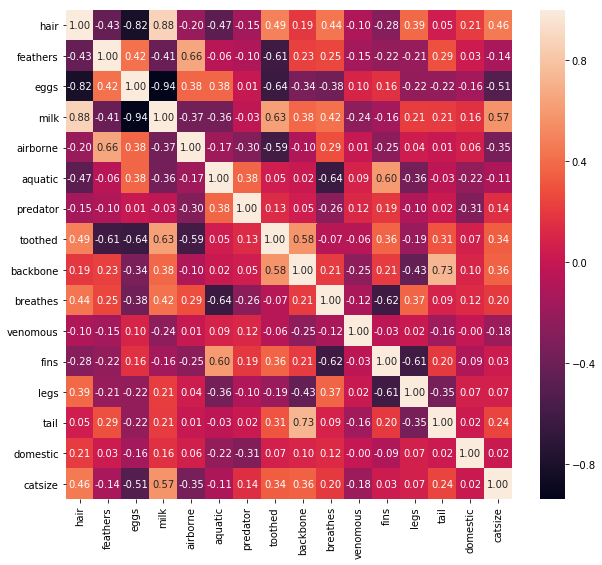

In [9]:
fig = plt.figure(figsize=(10,9))
sns.heatmap(data_new.corr(),annot=True,fmt='.2f');

In [10]:
x = data_new.drop('type',axis=1)
y = data_new['type']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
clf = LogisticRegression()
clf.fit(x_train,y_train)

f:\great_learnings\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
f:\great_learnings\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred = clf.predict(x_test)

In [14]:
cm = confusion_matrix(y_test,y_pred)

In [15]:
print(cm)

[[15  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  2  1  0  0]
 [ 0  0  0  0  5  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  1  0  0  0  0  0]]


In [16]:
accuracy_score(y_test,y_pred)

0.9354838709677419

In [24]:
m[clf.predict(np.array([True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,False]).reshape(-1,1).T)[0]]

'mammal'